<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

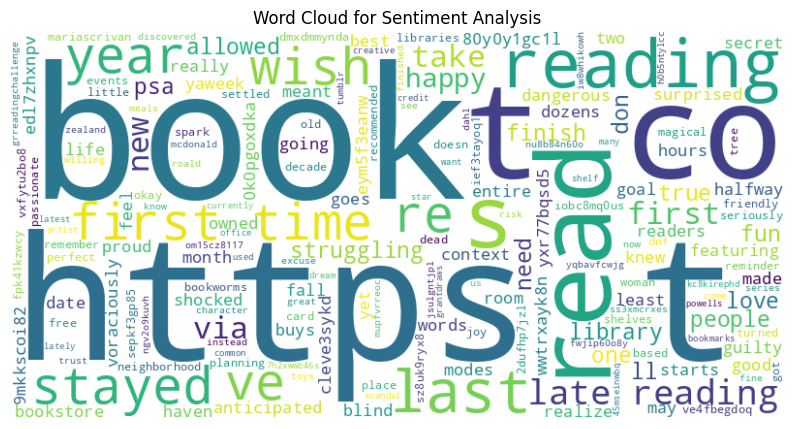

In [9]:
import requests
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the URL to fetch JSON data
url = "https://api.apify.com/v2/datasets/4FCa01p28r0EMFIkH/items?clean=true&format=json"

try:
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON data from the response
        data = response.json()

        # Extract relevant data
        tweet_texts = [tweet['full_text'] for tweet in data]

        # Perform sentiment analysis and filter out neutral words
        sentiment_words = []
        for text in tweet_texts:
            analysis = TextBlob(text)
            if analysis.sentiment.polarity != 0:
                sentiment_words.extend([word.lower() for word in analysis.words if len(word) > 1])  # Filter out single character words

        # Generate word cloud from sentiment words
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sentiment_words))

        # Display the word cloud
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Sentiment Analysis')
        plt.show()

    else:
        # Display an error message if the request was unsuccessful
        print(f"Error: HTTP status code {response.status_code} - {response.reason}")

except Exception as e:
    # Display an error message if any exception occurs
    print(f"Error fetching JSON data from URL: {e}")
